# Obesity Dataset

Dataset นี้ใช้สำหรับสร้าง model เพื่อทำการความเสี่ยงต่อการเป็นโรคอ้วน (obesity) โดยข้อมูลถูกเก็บรวบรวมโดยใช้ online survey และเก้บข้อมูลจากผู้เข้าร่วมทั้งหมด 1610 คน

### Data Description

- **Sex** (Male, Female)
- **Age** 
- **Height** (cm)
- **Overweight/Obese Families**: มีคนในครอบครัวเป็นโรคอ้วนหรือไม่
- **Consumption of Fast Food**: ชอบทานฟาสต์ฟู้ดหรือไม่
- **Frequency of Consuming Vegetables**: ความบ่อยของการทานผัก (Rarely, Sometimes, Always)
- **Number of Main Meals Daily**: จำนวนมืออาหารหลักในแต่ละวัน (1-2, 3, 3+)
- **Food Intake Between Meals**: ความบ่อยทานของการทานจุกจิกระหว่างมื้อ (Rarely, Sometimes, Usually, Always)
- **Smoking**: สูบบุหรี่หรือไม่
- **Liquid Intake Daily**: ปริมาณน้ำที่ทานในแต่ละวัน
    - Amount smaller than one liter
    - Within the range of 1 to 2 liters
    - In excess of 2 liters
- **Calculation Of Calorie Intake**: มีการคำนวณปริมาณ calories หรือไม่
- **Physical Exercise**: การออกกำลังการ
    - No physical activity
    - In the range of 1-2 days
    - In the range of 3-4 days
    - In the range of 5-6 days
    - 6+ days
- **Schedule Dedicated to Technology**: อยู่กับหน้าจอนานแค่ไหนต่อวัน
    - Between 0 and 2 hours (382)
    - Between 3 and 5 hours (826)
    - Exceeding five hours (402)
- **Type of Transportation Used**: รูปแบบการเดินทาง
    - Automobile
    - Motorbike
    - Bike
    - Public transportation
    - Walking
- **Class (target)**
    - Underweight (73)
    - Normal (658)
    - Overweight (592)
    - Obesity (287)

### Objectives

- สร้าง model classification อย่างน้อย 3 model และนำผลการทำนายมา vote
- ควรมีการทำ hyper-parameter tuning
- หาว่าปัจจัยอะไรที่มีผลต่อความเสี่ยงเป็นโรคอ้วน 3 ลำดับแรก


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('obesity_dataset.csv')

In [4]:
df.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2


### Data Inspection

ตรวจสอบโครงสร้างข้อมูล
- จำนวนแถว (entries)
- จำนวนคอลัมน์
- ชนิดข้อมูลของแต่ละคอลัมน์ (int64, float64, object ฯลฯ)
- จำนวน non-null values (ใช้เช็ค missing values เบื้องต้นได้)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Sex                                1610 non-null   int64
 1   Age                                1610 non-null   int64
 2   Height                             1610 non-null   int64
 3   Overweight_Obese_Family            1610 non-null   int64
 4   Consumption_of_Fast_Food           1610 non-null   int64
 5   Frequency_of_Consuming_Vegetables  1610 non-null   int64
 6   Number_of_Main_Meals_Daily         1610 non-null   int64
 7   Food_Intake_Between_Meals          1610 non-null   int64
 8   Smoking                            1610 non-null   int64
 9   Liquid_Intake_Daily                1610 non-null   int64
 10  Calculation_of_Calorie_Intake      1610 non-null   int64
 11  Physical_Excercise                 1610 non-null   int64
 12  Schedule_Dedicated_t

ตรวจสอบ missing values

In [6]:
print(df.isnull().sum())

Sex                                  0
Age                                  0
Height                               0
Overweight_Obese_Family              0
Consumption_of_Fast_Food             0
Frequency_of_Consuming_Vegetables    0
Number_of_Main_Meals_Daily           0
Food_Intake_Between_Meals            0
Smoking                              0
Liquid_Intake_Daily                  0
Calculation_of_Calorie_Intake        0
Physical_Excercise                   0
Schedule_Dedicated_to_Technology     0
Type_of_Transportation_Used          0
Class                                0
dtype: int64


ตรวจสอบค่าซ้ำ (duplicate)

In [7]:
print(df.duplicated().sum())

0


ผลจากการตรวจสอบข้อมูลเบื้องต้น มีดังนี้
- โครงสร้างข้อมูล: มี 1610 แถว, 15 คอลัมน์, ไม่มีค่า missing value
- ทุกคอลัมน์ ไม่มีค่า null
- ไม่มีแถวซ้ำ

Dataset สะอาดตั้งแต่ต้น สามารถทำ mapping ต่อได้เลย

### Mapping Categorical Variables

แปลงค่าตัวเลขของตัวแปรเชิงหมวดหมู่แบบ Nominal (ไม่มีลำดับ) ให้เป็นข้อความที่เข้าใจง่ายโดยใช้ เพื่อให้ง่ายต่อการวิเคราะห์และตีความผลลัพธ์

In [9]:
mapping = {
    'Class': {
        1: 'Underweight', 
        2: 'Normal', 
        3: 'Overweight', 
        4: 'Obesity'
    },
    'Sex': {
        1: 'Male', 
        2: 'Female'
    },
    'Overweight_Obese_Family': {
        1: 'Yes', 
        2: 'No'
    },
    'Consumption_of_Fast_Food': {
        1: 'Yes', 
        2: 'No'
    },
    'Smoking': {
        1: 'Yes', 
        2: 'No'
    },
    'Calculation_of_Calorie_Intake': {
        1: 'Yes', 
        2: 'No'
    },
    'Type_of_Transportation_Used': {
        1: 'Automobile', 
        2: 'Motorbike', 
        3: 'Bike', 
        4: 'Public transportation', 
        5: 'Walking'
    }
}

df = df.replace(mapping)
df['Class'].value_counts()

Class
Normal         658
Overweight     592
Obesity        287
Underweight     73
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

In [ ]:
# Numeric / Ordinal Features
numeric_ordinal_features = [
    'Age',
    'Height',
    'Frequency_of_Consuming_Vegetables',
    'Number_of_Main_Meals_Daily',
    'Food_Intake_Between_Meals',
    'Liquid_Intake_Daily',
    'Physical_Excercise',
    'Schedule_Dedicated_to_Technology'
]

# Nominal Features
nominal_features = [
    'Sex',
    'Overweight_Obese_Family',
    'Consumption_of_Fast_Food',
    'Smoking',
    'Calculation_of_Calorie_Intake',
    'Type_of_Transportation_Used'
]

#### Dependent Variable

**Class** คือผลลัพธ์ที่เราต้องการทำนาย (Target variable)  
  - Underweight  
  - Normal  
  - Overweight  
  - Obesity

In [ ]:
# Target
target = 'Class'

In [ ]:
x_numeric_ordinal = df[numeric_ordinal_features]   # เก็บ features ที่เป็น Numeric / Ordinal
x_categorical = df[nominal_features]               # เก็บ features ที่เป็น Nominal
y_target = df[target]                              # เก็บ Target

In [ ]:
x_numeric_ordinal

,Age,Height,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Liquid_Intake_Daily,Physical_Excercise,Schedule_Dedicated_to_Technology
0,18,155,3,1,3,1,3,3
1,18,158,3,1,1,1,1,3
2,18,159,2,1,3,3,2,3
3,18,162,2,2,2,2,1,3
4,18,165,2,1,3,1,3,3
...,...,...,...,...,...,...,...,...
1605,51,165,1,3,4,3,3,1
1606,51,163,2,2,4,2,5,1
1607,52,162,1,3,4,3,4,1
1608,53,168,1,3,4,2,2,1


In [ ]:
x_categorical

,Sex,Overweight_Obese_Family,Consumption_of_Fast_Food,Smoking,Calculation_of_Calorie_Intake,Type_of_Transportation_Used
0,Female,No,No,No,No,Public transportation
1,Female,No,No,No,No,Bike
2,Female,No,No,No,No,Public transportation
3,Female,No,No,No,No,Public transportation
4,Female,No,Yes,No,No,Motorbike
...,...,...,...,...,...,...
1605,Female,No,Yes,Yes,Yes,Automobile
1606,Female,No,Yes,No,No,Automobile
1607,Female,Yes,No,Yes,Yes,Automobile
1608,Female,No,Yes,Yes,No,Automobile


In [ ]:
y_target

0        Normal
1        Normal
2        Normal
3        Normal
4        Normal
         ...   
1605    Obesity
1606    Obesity
1607    Obesity
1608    Obesity
1609    Obesity
Name: Class, Length: 1610, dtype: object

Plot Pie Chart : Class Distribution

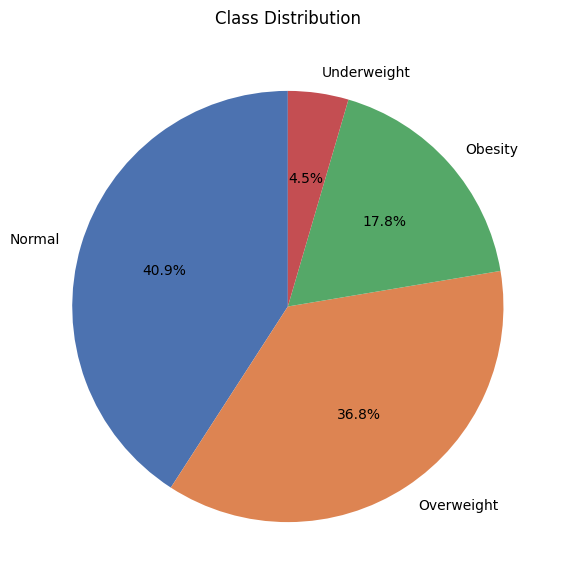

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# นับจำนวนของแต่ละ class
class_counts = df["Class"].value_counts()

# ใช้โทนสีจาก seaborn
colors = sns.color_palette("deep", n_colors=len(class_counts))

# วาด pie chart
plt.figure(figsize=(8, 7))
plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)

# ตั้งชื่อกราฟ
plt.title("Class Distribution", pad=10)
plt.show()

ดูการกระจายตัวของ `Class`
- Normal ~ 40.9%
- Overweight ~ 36.8%
- Obesity ~ 17.8%
- Underweight ~ 4.5%

### Bar Plot

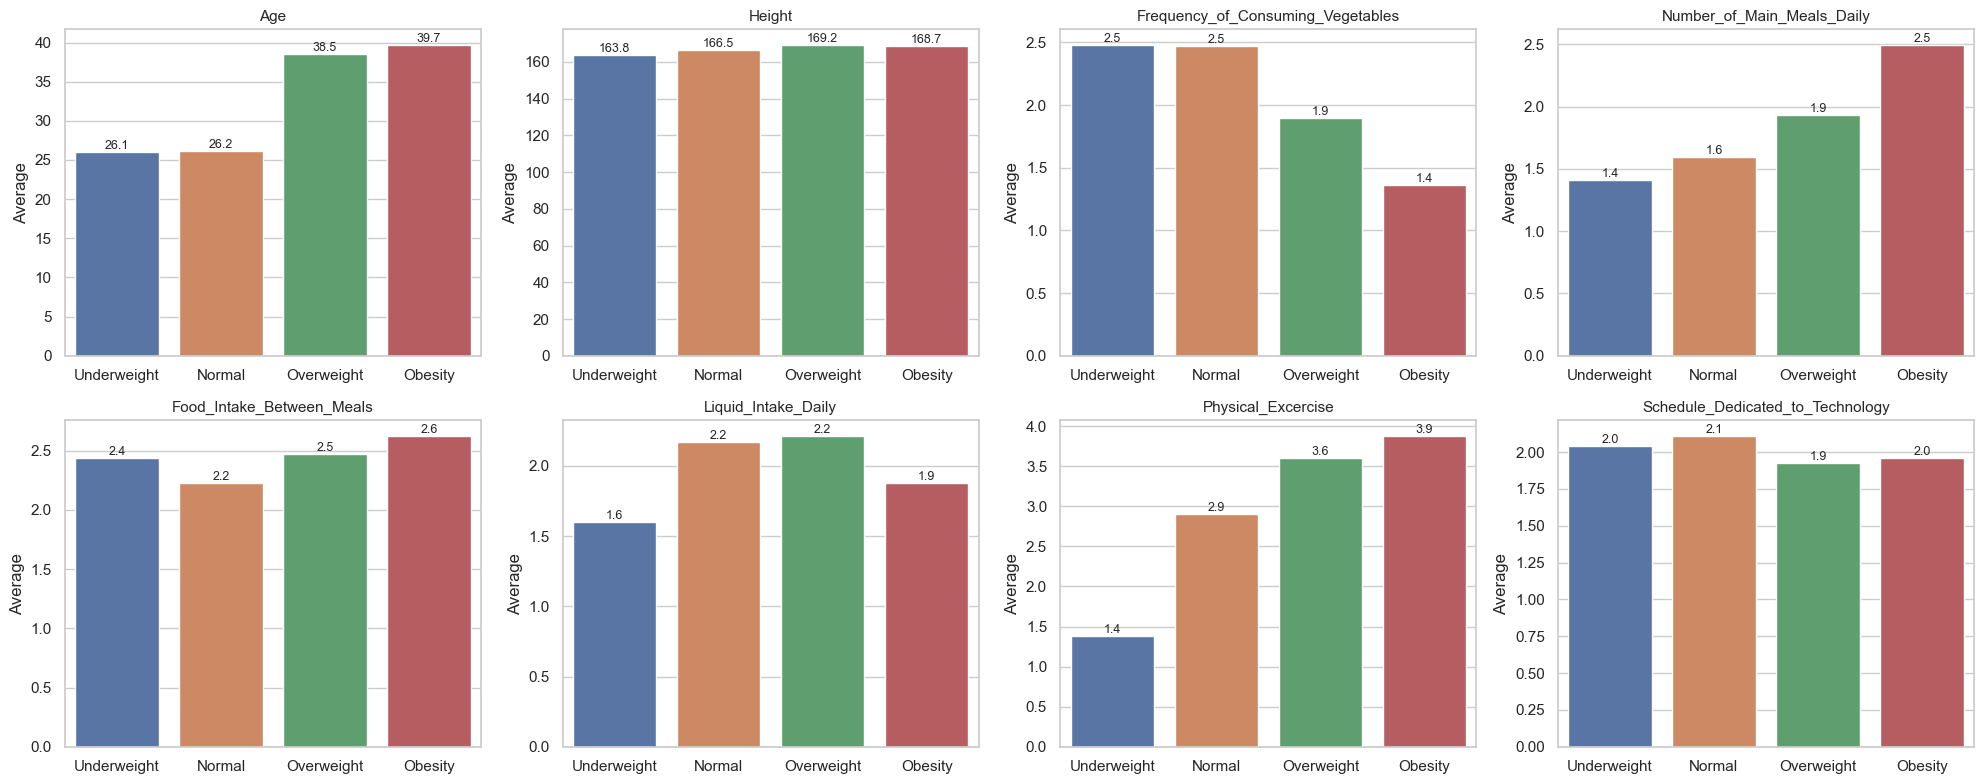

In [ ]:
sns.set_theme(style="whitegrid")

df_plot = df.copy()
df_plot["Class"] = pd.Categorical(df_plot["Class"],
                                  categories=['Underweight', 'Normal', 'Overweight', 'Obesity'],
                                  ordered=True)

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.ravel()

for i, col in enumerate(numeric_ordinal_features):
    ax = axes[i]
    sns.barplot(
        data=df_plot,
        x="Class", y=col,
        order=['Underweight', 'Normal', 'Overweight', 'Obesity'],
        estimator=np.mean,
        errorbar=None,
        palette="deep",
        hue="Class",
        legend=False,
        ax=ax
    )
    # ป้ายตัวเลขบนแท่ง
    for p in ax.patches:
        h = p.get_height()
        ax.annotate(f'{h:.1f}',
                    (p.get_x() + p.get_width()/2, h),
                    ha='center', va='bottom', fontsize=9)
    ax.set_title(col, fontsize=11, pad=6)
    ax.set_xlabel("")
    ax.set_ylabel("Average")

# ถ้ามีช่องเกิน (axes มากกว่า features) ซ่อนมัน
for j in range(len(numeric_ordinal_features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Box Plots

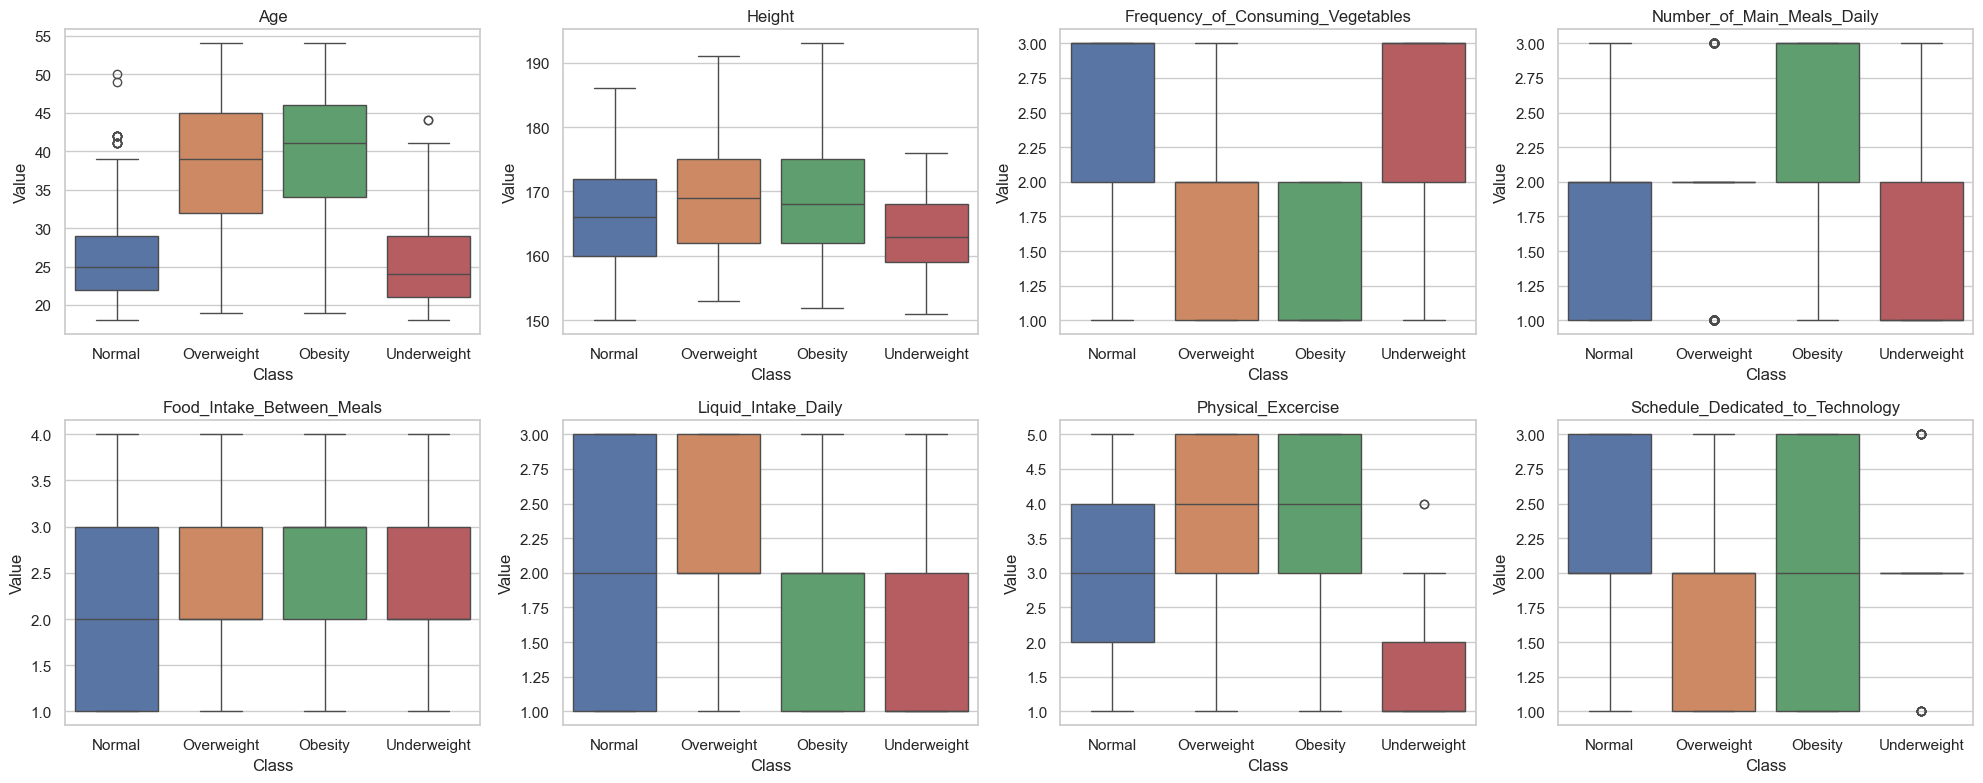

In [ ]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.ravel()

for i, col in enumerate(numeric_ordinal_features):
    if i >= len(axes):
        break
    
    sns.boxplot(
        data=df,
        x="Class", y=col,
        hue="Class",
        palette="deep",
        ax=axes[i]
    )
    axes[i].set_title(col)
    axes[i].set_ylabel("Value")
    
    if axes[i].get_legend() is not None:
        axes[i].get_legend().remove()

# ซ่อน axes ที่ไม่ได้ใช้
for j in range(len(numeric_ordinal_features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Correlation Heatmap

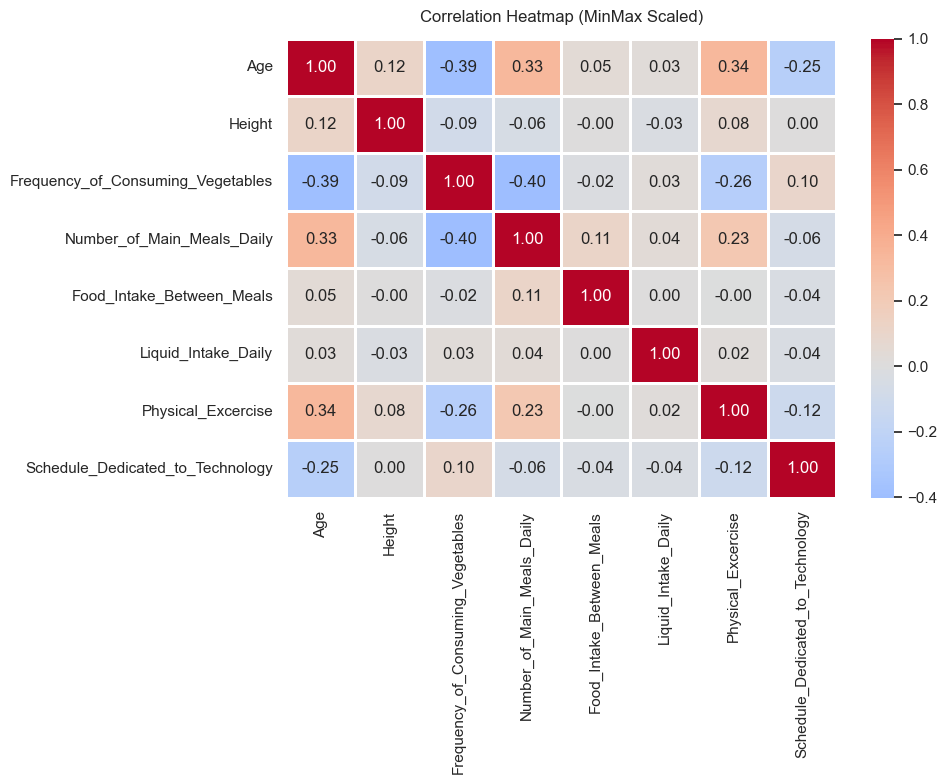

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0, 1]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[numeric_ordinal_features])
scaled_df = pd.DataFrame(scaled, columns=numeric_ordinal_features)

# คำนวณ correlation
corr = scaled_df.corr()

# วาด heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    linewidths=1
)
plt.title("Correlation Heatmap (MinMax Scaled)", pad=12)
plt.tight_layout()
plt.show()

### Feature Engineering

In [ ]:
import numpy as np

# Interaction features
df['Exercise_x_ScreenTime'] = df['Physical_Excercise'] * df['Schedule_Dedicated_to_Technology']
# การออกกำลังกาย x เวลาที่ใช้เทคโนโลยี = คนที่ออกกำลังเยอะแต่ใช้เทคโนโลยีมากด้วยอาจพฤติกรรมต่างกัน

df['Vegetable_x_Liquid'] = df['Frequency_of_Consuming_Vegetables'] * df['Liquid_Intake_Daily']
# ความถี่กินผัก x การดื่มน้ำ = ดูว่าคนที่กินผักเยอะ + ดื่มน้ำเยอะมีผลลัพธ์ยังไง

df['Meals_x_Snack'] = df['Number_of_Main_Meals_Daily'] * df['Food_Intake_Between_Meals']
# จำนวนมื้อหลัก x การกินจุบจิบ = คนที่กินมื้อหลักเยอะ + กินจุบจิบบ่อยอาจเสี่ยงกว่า

# Average features
df['Age_Height_Avg'] = (df['Age'] + df['Height']) / 2
# เฉลี่ยอายุและส่วนสูง = บางครั้งส่วนสูงสัมพันธ์กับอายุ/สุขภาพ

df['Diet_Avg'] = (df['Frequency_of_Consuming_Vegetables'] + 
                  df['Liquid_Intake_Daily'] + 
                  df['Number_of_Main_Meals_Daily']) / 3
# เฉลี่ยพฤติกรรมการกินหลัก ๆ = ผัก+น้ำ+มื้อหลัก เป็นตัวแทนพฤติกรรมอาหารรวม ๆ

df['Average_Meals_and_Exercise'] = (df['Number_of_Main_Meals_Daily'] + df['Physical_Excercise']) / 2
# เฉลี่ยจำนวนมื้อหลักและการออกกำลังกาย = คนที่มื้อหลักดี + ออกกำลังกายดี อาจสุขภาพดีขึ้น (เป็นตัวแทนพฤติกรรมรวมอาหาร+ออกกำลัง)

# Log transform (ลดผลกระทบจาก outlier)
df['Age_log'] = np.log1p(df['Age'])
# แปลงค่า Age เป็น log เพื่อลดอิทธิพลค่าที่สูงมาก

df['Height_log'] = np.log1p(df['Height'])
# แปลงค่า Height เป็น log เช่นเดียวกัน

# Ratio features
df['Exercise_per_ScreenHour'] = df['Physical_Excercise'] / (df['Schedule_Dedicated_to_Technology'] + 1)
# อัตราส่วนออกกำลังกายต่อเวลาใช้เทคโนโลยี (คนที่ออกกำลังเยอะแต่ใช้เทคโนฯ น้อยอาจสุขภาพดีกว่า)

df['Snacks_per_Meal'] = df['Food_Intake_Between_Meals'] / (df['Number_of_Main_Meals_Daily'] + 1)
# อัตราการกินจุบจิบต่อจำนวนมื้อหลัก

In [ ]:
df.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,...,Exercise_x_ScreenTime,Vegetable_x_Liquid,Meals_x_Snack,Age_Height_Avg,Diet_Avg,Average_Meals_and_Exercise,Age_log,Height_log,Exercise_per_ScreenHour,Snacks_per_Meal
0,Female,18,155,No,No,3,1,3,No,1,...,9,3,3,86.5,1.666667,2.0,2.944439,5.049856,0.75,1.500000
1,Female,18,158,No,No,3,1,1,No,1,...,3,3,1,88.0,1.666667,1.0,2.944439,5.068904,0.25,0.500000
2,Female,18,159,No,No,2,1,3,No,3,...,6,6,3,88.5,2.000000,1.5,2.944439,5.075174,0.50,1.500000
3,Female,18,162,No,No,2,2,2,No,2,...,3,4,4,90.0,2.000000,1.5,2.944439,5.093750,0.25,0.666667
4,Female,18,165,No,Yes,2,1,3,No,1,...,9,2,3,91.5,1.333333,2.0,2.944439,5.111988,0.75,1.500000


In [ ]:
df.columns

Index(['Sex', 'Age', 'Height', 'Overweight_Obese_Family',
       'Consumption_of_Fast_Food', 'Frequency_of_Consuming_Vegetables',
       'Number_of_Main_Meals_Daily', 'Food_Intake_Between_Meals', 'Smoking',
       'Liquid_Intake_Daily', 'Calculation_of_Calorie_Intake',
       'Physical_Excercise', 'Schedule_Dedicated_to_Technology',
       'Type_of_Transportation_Used', 'Class', 'Exercise_x_ScreenTime',
       'Vegetable_x_Liquid', 'Meals_x_Snack', 'Age_Height_Avg', 'Diet_Avg',
       'Average_Meals_and_Exercise', 'Age_log', 'Height_log',
       'Exercise_per_ScreenHour', 'Snacks_per_Meal'],
      dtype='object')

### Train Test Split

In [ ]:
X = df.drop(columns="Class")

In [ ]:
X

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,...,Exercise_x_ScreenTime,Vegetable_x_Liquid,Meals_x_Snack,Age_Height_Avg,Diet_Avg,Average_Meals_and_Exercise,Age_log,Height_log,Exercise_per_ScreenHour,Snacks_per_Meal
0,Female,18,155,No,No,3,1,3,No,1,...,9,3,3,86.5,1.666667,2.0,2.944439,5.049856,0.75,1.500000
1,Female,18,158,No,No,3,1,1,No,1,...,3,3,1,88.0,1.666667,1.0,2.944439,5.068904,0.25,0.500000
2,Female,18,159,No,No,2,1,3,No,3,...,6,6,3,88.5,2.000000,1.5,2.944439,5.075174,0.50,1.500000
3,Female,18,162,No,No,2,2,2,No,2,...,3,4,4,90.0,2.000000,1.5,2.944439,5.093750,0.25,0.666667
4,Female,18,165,No,Yes,2,1,3,No,1,...,9,2,3,91.5,1.333333,2.0,2.944439,5.111988,0.75,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Female,51,165,No,Yes,1,3,4,Yes,3,...,3,3,12,108.0,2.333333,3.0,3.951244,5.111988,1.50,1.000000
1606,Female,51,163,No,Yes,2,2,4,No,2,...,5,4,8,107.0,2.000000,3.5,3.951244,5.099866,2.50,1.333333
1607,Female,52,162,Yes,No,1,3,4,Yes,3,...,4,3,12,107.0,2.333333,3.5,3.970292,5.093750,2.00,1.000000
1608,Female,53,168,No,Yes,1,3,4,Yes,2,...,2,2,12,110.5,2.000000,2.5,3.988984,5.129899,1.00,1.000000


In [ ]:
y = df['Class']

In [ ]:
y

0        Normal
1        Normal
2        Normal
3        Normal
4        Normal
         ...   
1605    Obesity
1606    Obesity
1607    Obesity
1608    Obesity
1609    Obesity
Name: Class, Length: 1610, dtype: object

In [ ]:
# Imbalance Data
y.value_counts().sort_values()

Class
Underweight     73
Obesity        287
Overweight     592
Normal         658
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
X_train

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,...,Exercise_x_ScreenTime,Vegetable_x_Liquid,Meals_x_Snack,Age_Height_Avg,Diet_Avg,Average_Meals_and_Exercise,Age_log,Height_log,Exercise_per_ScreenHour,Snacks_per_Meal
0,Female,42,168,Yes,No,2,2,2,Yes,2,...,2,4,4,105.0,2.000000,2.0,3.761200,5.129899,1.000000,0.666667
1,Male,21,180,Yes,No,3,1,1,No,2,...,15,6,1,100.5,2.000000,3.0,3.091042,5.198497,1.250000,0.500000
2,Female,47,158,No,No,2,1,4,No,3,...,10,6,4,102.5,2.000000,3.0,3.871201,5.068904,1.666667,2.000000
3,Female,43,171,No,No,2,2,2,No,2,...,4,4,4,107.0,2.000000,3.0,3.784190,5.147494,2.000000,0.666667
4,Male,41,173,No,No,2,2,2,No,3,...,4,6,4,107.0,2.333333,3.0,3.737670,5.159055,2.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,Female,24,161,No,No,3,1,2,No,1,...,6,3,2,92.5,1.666667,2.0,3.218876,5.087596,1.000000,1.000000
1284,Male,46,163,No,Yes,2,2,1,No,1,...,10,2,2,104.5,1.666667,3.5,3.850148,5.099866,1.666667,0.333333
1285,Female,46,156,No,Yes,1,3,2,No,3,...,15,3,6,101.0,2.333333,4.0,3.850148,5.056246,1.250000,0.500000
1286,Female,34,168,No,No,3,1,3,No,3,...,6,9,3,101.0,2.333333,2.0,3.555348,5.129899,1.000000,1.500000


In [ ]:
X_test

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,...,Exercise_x_ScreenTime,Vegetable_x_Liquid,Meals_x_Snack,Age_Height_Avg,Diet_Avg,Average_Meals_and_Exercise,Age_log,Height_log,Exercise_per_ScreenHour,Snacks_per_Meal
0,Female,22,158,No,No,3,2,1,No,1,...,9,3,2,90.0,2.000000,2.5,3.135494,5.068904,0.750000,0.333333
1,Female,35,155,No,Yes,1,3,4,No,3,...,12,3,12,95.0,2.333333,3.5,3.583519,5.049856,1.000000,1.000000
2,Female,26,155,No,No,3,2,3,No,2,...,6,6,6,90.5,2.333333,2.0,3.295837,5.049856,0.500000,1.000000
3,Female,25,172,No,No,2,1,3,No,2,...,8,4,3,98.5,1.666667,2.5,3.258097,5.153292,1.333333,1.500000
4,Female,45,160,No,No,2,1,2,No,3,...,4,6,2,102.5,2.000000,2.5,3.828641,5.081404,2.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Male,33,173,Yes,Yes,1,3,2,Yes,3,...,10,3,6,103.0,2.333333,4.0,3.526361,5.159055,1.666667,0.500000
318,Female,20,162,No,Yes,2,2,1,No,1,...,9,2,2,91.0,1.666667,2.5,3.044522,5.093750,0.750000,0.333333
319,Female,33,157,No,No,1,2,4,No,2,...,4,2,8,95.0,1.666667,3.0,3.526361,5.062595,2.000000,1.333333
320,Female,24,157,No,No,3,2,3,No,1,...,4,3,6,90.5,2.000000,2.0,3.218876,5.062595,0.666667,1.000000


### One-hot Encoding

In [ ]:
import pandas as pd

X_train = pd.get_dummies(X_train, columns=nominal_features, dtype=int)
X_test = pd.get_dummies(X_test, columns=nominal_features, dtype=int)

In [ ]:
X_train

,Age,Height,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Liquid_Intake_Daily,Physical_Excercise,Schedule_Dedicated_to_Technology,Exercise_x_ScreenTime,Vegetable_x_Liquid,...,Consumption_of_Fast_Food_Yes,Smoking_No,Smoking_Yes,Calculation_of_Calorie_Intake_No,Calculation_of_Calorie_Intake_Yes,Type_of_Transportation_Used_Automobile,Type_of_Transportation_Used_Bike,Type_of_Transportation_Used_Motorbike,Type_of_Transportation_Used_Public transportation,Type_of_Transportation_Used_Walking
0,42,168,2,2,2,2,2,1,2,4,...,0,0,1,1,0,1,0,0,0,0
1,21,180,3,1,1,2,5,3,15,6,...,0,1,0,1,0,0,0,0,1,0
2,47,158,2,1,4,3,5,2,10,6,...,0,1,0,0,1,1,0,0,0,0
3,43,171,2,2,2,2,4,1,4,4,...,0,1,0,0,1,1,0,0,0,0
4,41,173,2,2,2,3,4,1,4,6,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,24,161,3,1,2,1,3,2,6,3,...,0,1,0,1,0,0,0,0,1,0
1284,46,163,2,2,1,1,5,2,10,2,...,1,1,0,1,0,1,0,0,0,0
1285,46,156,1,3,2,3,5,3,15,3,...,1,1,0,1,0,1,0,0,0,0
1286,34,168,3,1,3,3,3,2,6,9,...,0,1,0,1,0,1,0,0,0,0


In [ ]:
X_test

,Age,Height,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Liquid_Intake_Daily,Physical_Excercise,Schedule_Dedicated_to_Technology,Exercise_x_ScreenTime,Vegetable_x_Liquid,...,Consumption_of_Fast_Food_Yes,Smoking_No,Smoking_Yes,Calculation_of_Calorie_Intake_No,Calculation_of_Calorie_Intake_Yes,Type_of_Transportation_Used_Automobile,Type_of_Transportation_Used_Bike,Type_of_Transportation_Used_Motorbike,Type_of_Transportation_Used_Public transportation,Type_of_Transportation_Used_Walking
0,22,158,3,2,1,1,3,3,9,3,...,0,1,0,1,0,0,1,0,0,0
1,35,155,1,3,4,3,4,3,12,3,...,1,1,0,0,1,0,0,0,1,0
2,26,155,3,2,3,2,2,3,6,6,...,0,1,0,1,0,0,0,1,0,0
3,25,172,2,1,3,2,4,2,8,4,...,0,1,0,1,0,0,0,0,1,0
4,45,160,2,1,2,3,4,1,4,6,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,33,173,1,3,2,3,5,2,10,3,...,1,0,1,0,1,0,0,0,0,1
318,20,162,2,2,1,1,3,3,9,2,...,1,1,0,1,0,0,0,0,0,1
319,33,157,1,2,4,2,4,1,4,2,...,0,1,0,1,0,1,0,0,0,0
320,24,157,3,2,3,1,2,2,4,3,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
X_train.columns

Index(['Age', 'Height', 'Frequency_of_Consuming_Vegetables',
       'Number_of_Main_Meals_Daily', 'Food_Intake_Between_Meals',
       'Liquid_Intake_Daily', 'Physical_Excercise',
       'Schedule_Dedicated_to_Technology', 'Exercise_x_ScreenTime',
       'Vegetable_x_Liquid', 'Meals_x_Snack', 'Age_Height_Avg', 'Diet_Avg',
       'Average_Meals_and_Exercise', 'Age_log', 'Height_log',
       'Exercise_per_ScreenHour', 'Snacks_per_Meal', 'Sex_Female', 'Sex_Male',
       'Overweight_Obese_Family_No', 'Overweight_Obese_Family_Yes',
       'Consumption_of_Fast_Food_No', 'Consumption_of_Fast_Food_Yes',
       'Smoking_No', 'Smoking_Yes', 'Calculation_of_Calorie_Intake_No',
       'Calculation_of_Calorie_Intake_Yes',
       'Type_of_Transportation_Used_Automobile',
       'Type_of_Transportation_Used_Bike',
       'Type_of_Transportation_Used_Motorbike',
       'Type_of_Transportation_Used_Public transportation',
       'Type_of_Transportation_Used_Walking'],
      dtype='object')

In [ ]:
X_test.columns

Index(['Age', 'Height', 'Frequency_of_Consuming_Vegetables',
       'Number_of_Main_Meals_Daily', 'Food_Intake_Between_Meals',
       'Liquid_Intake_Daily', 'Physical_Excercise',
       'Schedule_Dedicated_to_Technology', 'Exercise_x_ScreenTime',
       'Vegetable_x_Liquid', 'Meals_x_Snack', 'Age_Height_Avg', 'Diet_Avg',
       'Average_Meals_and_Exercise', 'Age_log', 'Height_log',
       'Exercise_per_ScreenHour', 'Snacks_per_Meal', 'Sex_Female', 'Sex_Male',
       'Overweight_Obese_Family_No', 'Overweight_Obese_Family_Yes',
       'Consumption_of_Fast_Food_No', 'Consumption_of_Fast_Food_Yes',
       'Smoking_No', 'Smoking_Yes', 'Calculation_of_Calorie_Intake_No',
       'Calculation_of_Calorie_Intake_Yes',
       'Type_of_Transportation_Used_Automobile',
       'Type_of_Transportation_Used_Bike',
       'Type_of_Transportation_Used_Motorbike',
       'Type_of_Transportation_Used_Public transportation',
       'Type_of_Transportation_Used_Walking'],
      dtype='object')

### Imbalance Data

In [ ]:
y_train.value_counts().sort_values()

Class
Underweight     58
Obesity        230
Overweight     474
Normal         526
Name: count, dtype: int64

In [ ]:
y_test.value_counts().sort_values()

Class
Underweight     15
Obesity         57
Overweight     118
Normal         132
Name: count, dtype: int64

### Cross Validation & Hyperparameter Tuning

In [ ]:
# Random Forest Parameters
rf_params = {
    'clf__n_estimators': [100, 300, 500],
    'clf__max_depth': [5, 10, None],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', None],
    'clf__class_weight': [None],
}

# Gradient Boosting Parameters
gb_params = {
    'clf__n_estimators': [100, 300],
    'clf__learning_rate': [0.01, 0.05, 0.1],
    'clf__max_depth': [3, 5],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2],
    'clf__max_features': ['sqrt', None],
    'clf__subsample': [0.7, 1.0],         # use stochastic boosting
}

# Logistic Regression Parameters
# lr_params = {
#     'clf__C': [0.01, 0.1, 1, 10],
#     'clf__penalty': ['l2'],
#     'clf__solver': ['lbfgs', 'saga'],
#     'clf__max_iter': [8000]
# }

lr_params = {
    'clf__solver': ['saga'],
    'clf__penalty': ['elasticnet'],
    'clf__l1_ratio': [0.15, 0.5, 0.85],
    'clf__C': [0.01, 0.1, 1, 3, 10, 30],
    'clf__class_weight': [None],
    'clf__max_iter': [8000],
}

In [ ]:
!pip install imbalanced-learn

In [ ]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def tune_model(pipeline, param_grid, X_train, y_train):
    grid = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=cv,
        scoring='f1_weighted',
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)
    return grid

In [ ]:
# Random Forest

pipe_rf = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

rf_grid = tune_model(pipe_rf, rf_params, X_train, y_train)
print("Best RF params:", rf_grid.best_params_)
print("Best RF score:", rf_grid.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best RF params: {'clf__class_weight': None, 'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Best RF score: 0.8404487984567652


In [ ]:
# Gradient Boosting
pipe_gb = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', GradientBoostingClassifier(random_state=42))
])

gb_grid = tune_model(pipe_gb, gb_params, X_train, y_train)
print("Best GB params:", gb_grid.best_params_)
print("Best GB score:", gb_grid.best_score_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best GB params: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 300, 'clf__subsample': 1.0}
Best GB score: 0.8416245978257162


In [ ]:
# Logistic Regression
# - Binary classification -> Sigmoid function
# - Multiclass classification -> Softmax function
# Logistic Regression is sensitive to feature scale
# - Standardize features with StandardScaler
# Note: with_mean=False is required for sparse data

pipe_lr = Pipeline([
    ('smote', SMOTE(random_state=42)),
    # Standardize features (Logistic Regression sensitive to scale).
    # with_mean=False is required for sparse data.
    ('scaler', StandardScaler(with_mean=False)),
    # ('scaler', MaxAbsScaler()),
    ('clf', LogisticRegression(random_state=42))
])

lr_grid = tune_model(pipe_lr, lr_params, X_train, y_train)
print("Best LR params:", lr_grid.best_params_)
print("Best LR score:", lr_grid.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best LR params: {'clf__C': 0.1, 'clf__class_weight': None, 'clf__l1_ratio': 0.15, 'clf__max_iter': 8000, 'clf__penalty': 'elasticnet', 'clf__solver': 'saga'}
Best LR score: 0.7315077619142789


In [ ]:
best_rf = rf_grid.best_estimator_
best_rf

,steps,"[('smote', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [ ]:
best_gb = gb_grid.best_estimator_
best_gb

,steps,"[('smote', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5
,loss,'log_loss'
,learning_rate,0.1
,n_estimators,300
,subsample,1.0


In [ ]:
best_lr = lr_grid.best_estimator_
best_lr

,steps,"[('smote', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5
,copy,True
,with_mean,False
,with_std,True
,penalty,'elasticnet'


In [ ]:
from sklearn.ensemble import VotingClassifier

w_rf = rf_grid.best_score_
w_gb = gb_grid.best_score_
w_lr = lr_grid.best_score_

voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('gb', best_gb),
        ('lr', best_lr)
    ],
    voting='soft',
    weights=[w_rf, w_gb, w_lr]
)

voting_clf.fit(X_train, y_train)

,estimators,"[('rf', ...), ('gb', ...), ...]"
,voting,'soft'
,weights,"[np.float64(0.8404487984567652), np.float64(0.8416245978257162), ...]"
,n_jobs,None
,flatten_transform,True
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5
,n_estimators,100
,criterion,'gini'


### Evaluation

Summary Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = voting_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.8788819875776398
Precision: 0.8823572869630524
Recall: 0.8788819875776398
F1 Score: 0.8788960010908379


โมเดลให้ค่า Accuracy, Precision, Recall และ F1 Score ที่อยู่ในระดับใกล้เคียงกัน (~0.879) ซึ่งสะท้อนว่าโมเดลมีการ เทรดออฟระหว่างความแม่นยำ (precision) และความครอบคลุม (recall) ที่สมดุล ผลลัพธ์ดังกล่าวบ่งชี้ว่าโมเดลสามารถจำแนกตัวอย่างได้อย่างมีประสิทธิภาพและเสถียร โดยไม่มีการเอนเอียงไปทาง precision หรือ recall มากเกินไป

Classification Report

In [ ]:
class_names = df['Class'].unique().tolist()
class_names

['Normal', 'Overweight', 'Obesity', 'Underweight']

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      Normal       0.91      0.89      0.90       132
  Overweight       0.94      0.81      0.87        57
     Obesity       0.83      0.92      0.87       118
 Underweight       0.86      0.80      0.83        15

    accuracy                           0.88       322
   macro avg       0.88      0.85      0.87       322
weighted avg       0.88      0.88      0.88       322



**ภาพรวม**

- โมเดลมี Accuracy = 0.88 ถือว่าค่อนข้างสูง หมายความว่าโมเดลทำนายถูกเกือบ 9 ใน 10 ตัวอย่าง
- ค่าของ Precision, Recall และ F1-score (ทั้ง macro และ weighted average) อยู่ในช่วง 0.85–0.88 แสดงว่าโมเดลทำงานได้สมดุลดี ไม่ได้เอียงไปทางใดทางหนึ่งหรือ bias มากเกินไป

**ผลลัพธ์รายคลาส**

- **Underweight (ผอม/น้ำหนักน้อยกว่ามาตรฐาน)**: Precision สูง (0.94) แปลว่าเวลาที่โมเดลบอกว่าเป็น Underweight มักจะถูกต้อง แต่ Recall ค่อนข้างต่ำ (0.81) คือยังมีบางกรณีที่โมเดลจับไม่เจอ
- **Normal (น้ำหนักปกติ)**: ได้คะแนน F1 สูงที่สุด (0.90) ทั้ง precision และ recall อยู่ในระดับดี แสดงว่าโมเดลแม่นยำกับกลุ่มนี้มาก
- **Overweight (น้ำหนักเกิน)**: F1 ต่ำสุด (0.83) สาเหตุหลักเพราะจำนวนข้อมูลในคลาสนี้น้อย (15 ตัวอย่าง) ทำให้โมเดลเรียนรู้ได้ไม่เต็มที่
- **Obesity (โรคอ้วน)**: Recall สูงที่สุด (0.92) หมายความว่าโมเดลตรวจจับกลุ่มอ้วนได้ดี แม้ precision จะอยู่แค่ 0.83

**สรุปภาพรวม**

โดยรวมโมเดลให้ผลลัพธ์ แม่นยำและครอบคลุม ค่อนข้างสมดุล (Accuracy และ F1 ~0.88) เห็นได้ชัดว่าโมเดลทำงานได้ดีในคลาสที่มีข้อมูลมาก เช่น Normal และ Obesity ส่วนกลุ่มที่ข้อมูลน้อยอย่าง Underweight มีประสิทธิภาพต่ำกว่าเล็กน้อย ซึ่งเป็นข้อจำกัดจากจำนวนข้อมูล แต่ภาพรวมแล้ว โมเดลถือว่า เสถียรและน่าเชื่อถือสำหรับการจำแนก BMI หลายกลุ่ม

Confusion Matrix

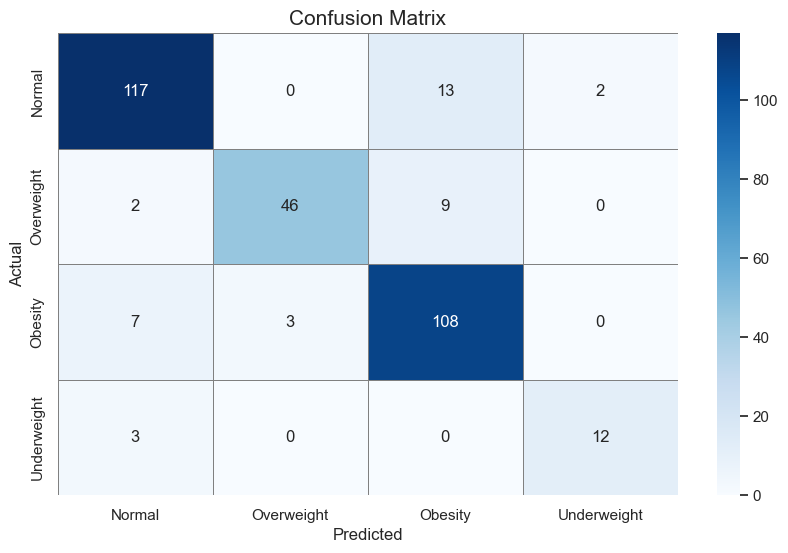

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names,
            linewidths=0.5, linecolor='gray')

ax.set_xlabel("Predicted", fontsize=12)
ax.set_ylabel("Actual", fontsize=12)
ax.set_title("Confusion Matrix", fontsize=15)

plt.show()

**การตีความทีละคลาส**

Normal (117 ถูก, 15 พลาด)
ส่วนใหญ่ทายถูก (117 เคส) แต่ยังมีบางเคสที่โมเดลสับสนกับ Obesity (13) และ Underweight (2) โมเดลมักจะแยก Normal ออกจาก Obesity ยากเล็กน้อย

Overweight (46 ถูก, 11 พลาด)
ทายถูก 46 เคส แต่มี 9 เคสสับสนกับ Obesity และ 2 เคสสับสนกับ Normal กลุ่ม Overweight มีความใกล้เคียง Obesity เลยทำให้พลาด

Obesity (108 ถูก, 10 พลาด)
ตรวจจับ Obesity ได้ดีมาก (108 เคสถูกต้อง) แต่บางเคสทายผิดเป็น Normal (7) หรือ Overweight (3) แสดงว่าโมเดลแยก Obesity ออกได้ชัดเจน

Underweight (12 ถูก, 3 พลาด)
ทายถูก 12 เคส แต่พลาดเป็น Normal (3) เพราะกลุ่มนี้ตัวอย่างน้อย ทำให้โมเดลยังสับสนกับ Normal

### Feature Importance

Random Forest Feature Importance

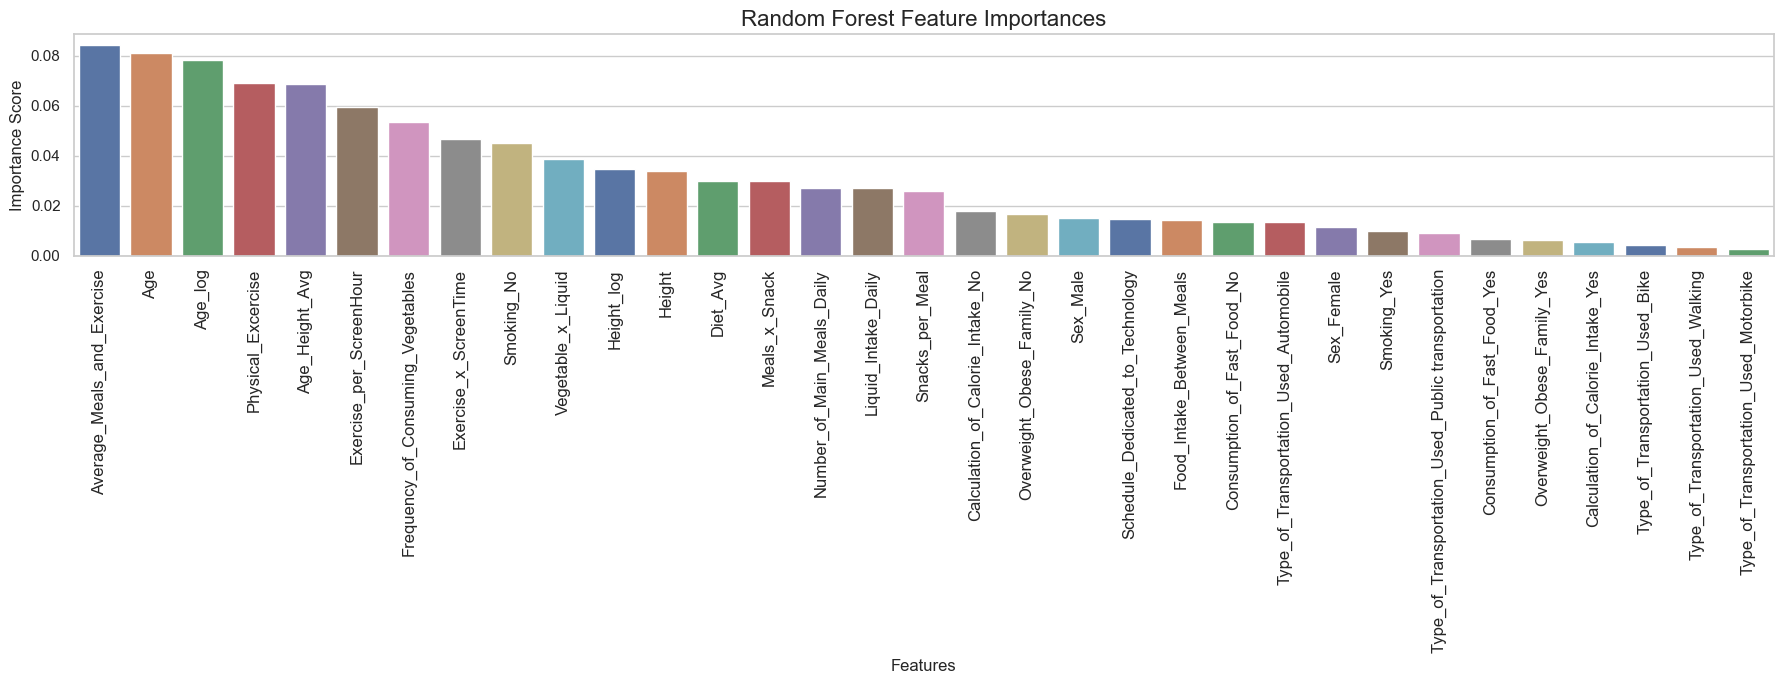

,Feature,Importance
0,Average_Meals_and_Exercise,0.084378
1,Age,0.081160
2,Age_log,0.078394
3,Physical_Excercise,0.069000
4,Age_Height_Avg,0.068766
5,Exercise_per_ScreenHour,0.059399
6,Frequency_of_Consuming_Vegetables,0.053427
7,Exercise_x_ScreenTime,0.046690
8,Smoking_No,0.045070
9,Vegetable_x_Liquid,0.038773


In [ ]:
rf_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_grid.best_estimator_.named_steps['clf'].feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(18, 7))
sns.barplot(x="Feature", y="Importance", hue="Feature", data=rf_importances, palette="deep")
plt.xticks(rotation=90, fontsize=12)
plt.title("Random Forest Feature Importances", fontsize=16)
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

rf_importances

Gradient Boosting Feature Importance

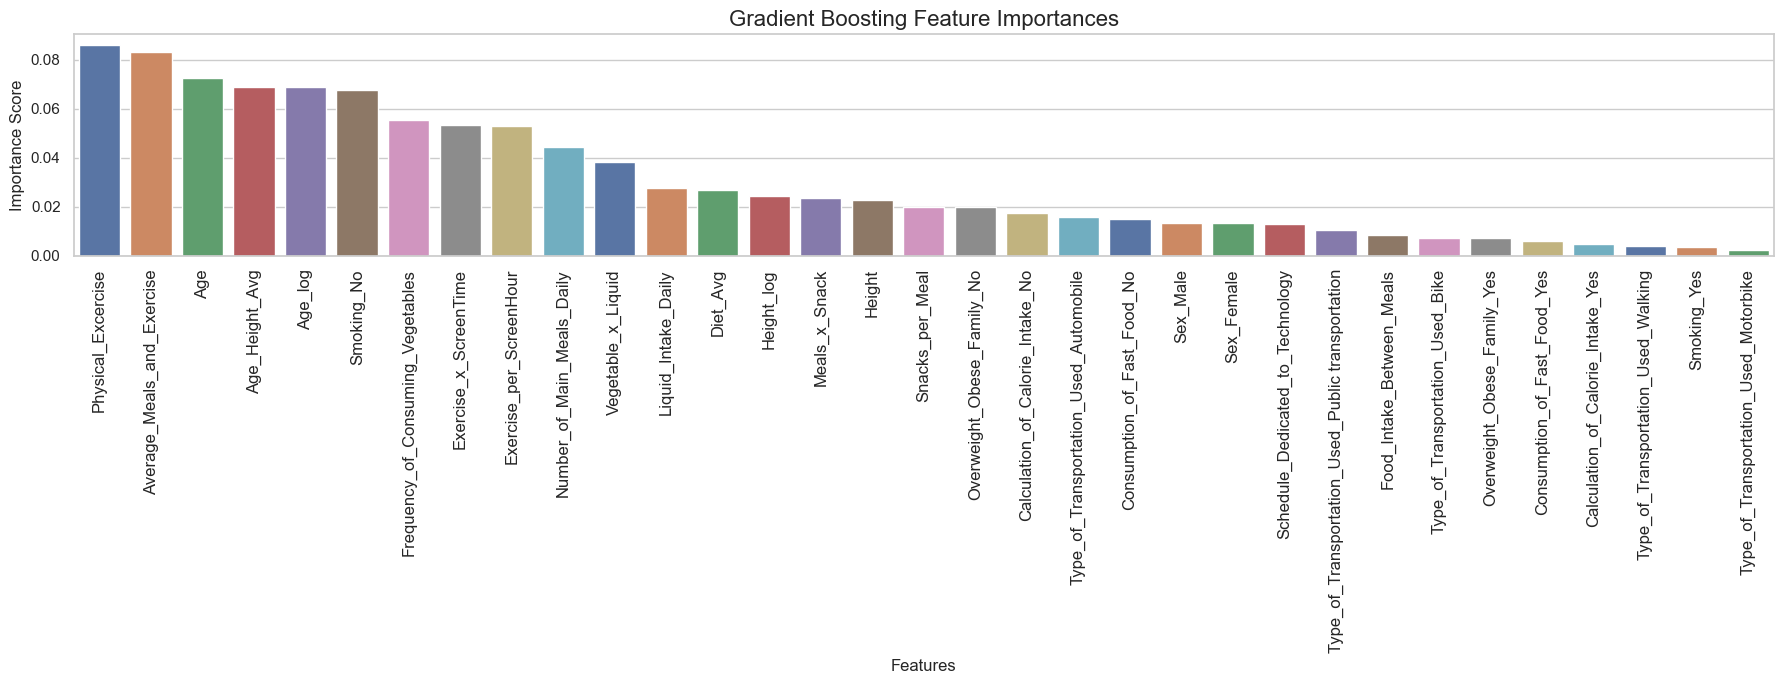

,Feature,Importance
0,Physical_Excercise,0.086111
1,Average_Meals_and_Exercise,0.083121
2,Age,0.072638
3,Age_Height_Avg,0.068978
4,Age_log,0.068803
5,Smoking_No,0.067925
6,Frequency_of_Consuming_Vegetables,0.055314
7,Exercise_x_ScreenTime,0.053510
8,Exercise_per_ScreenHour,0.052860
9,Number_of_Main_Meals_Daily,0.044268


In [ ]:
gb_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_grid.best_estimator_.named_steps['clf'].feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(18, 7))
sns.barplot(x="Feature", y="Importance", hue="Feature", data=gb_importances, palette="deep")
plt.xticks(rotation=90, fontsize=12)
plt.title("Gradient Boosting Feature Importances", fontsize=16)
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

gb_importances

Logistic Regression Coefficients (Absolute)

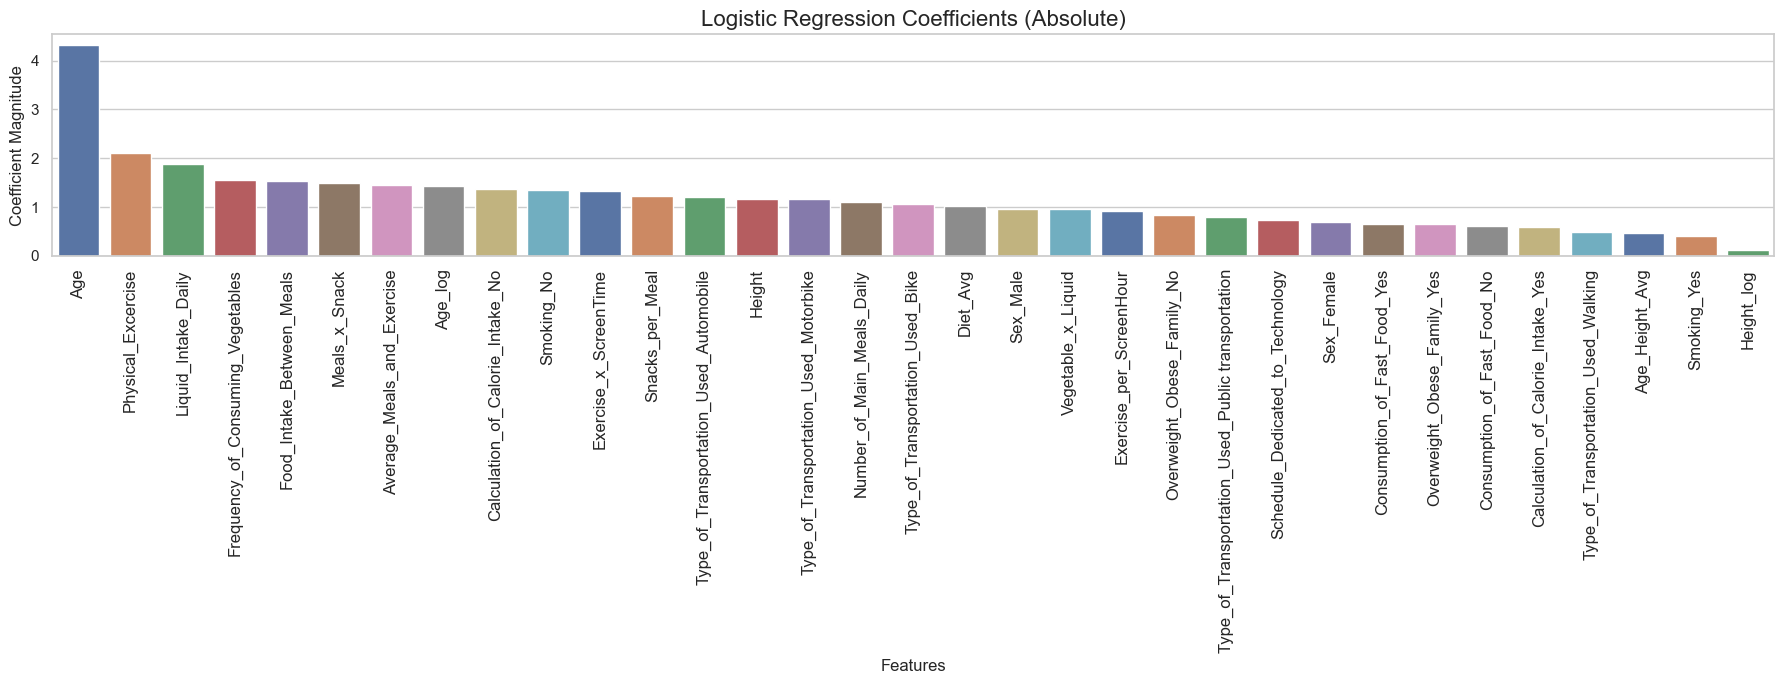

,Feature,Coefficient
0,Age,4.319178
1,Physical_Excercise,2.103009
2,Liquid_Intake_Daily,1.891341
3,Frequency_of_Consuming_Vegetables,1.550824
4,Food_Intake_Between_Meals,1.535546
5,Meals_x_Snack,1.498324
6,Average_Meals_and_Exercise,1.459446
7,Age_log,1.422023
8,Calculation_of_Calorie_Intake_No,1.367070
9,Smoking_No,1.356180


In [ ]:
coefs = lr_grid.best_estimator_.named_steps['clf'].coef_
coefs_abs = np.abs(coefs).mean(axis=0)

lr_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefs_abs
}).sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

plt.figure(figsize=(18, 7))
sns.barplot(x="Feature", y="Coefficient", hue="Feature", data=lr_importances, palette="deep")
plt.xticks(rotation=90, fontsize=12)
plt.title("Logistic Regression Coefficients (Absolute)", fontsize=16)
plt.ylabel("Coefficient Magnitude")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

lr_importances

In [ ]:
summary = pd.DataFrame({
    "RandomForest": rf_importances['Feature'].head(10).values,
    "GradientBoosting": gb_importances['Feature'].head(10).values,
    "LogisticRegression": lr_importances['Feature'].head(10).values
})

print("Top 10 Features Comparison")
display(summary)

Top 10 Features Comparison


,RandomForest,GradientBoosting,LogisticRegression
0,Average_Meals_and_Exercise,Physical_Excercise,Age
1,Age,Average_Meals_and_Exercise,Physical_Excercise
2,Age_log,Age,Liquid_Intake_Daily
3,Physical_Excercise,Age_Height_Avg,Frequency_of_Consuming_Vegetables
4,Age_Height_Avg,Age_log,Food_Intake_Between_Meals
5,Exercise_per_ScreenHour,Smoking_No,Meals_x_Snack
6,Frequency_of_Consuming_Vegetables,Frequency_of_Consuming_Vegetables,Average_Meals_and_Exercise
7,Exercise_x_ScreenTime,Exercise_x_ScreenTime,Age_log
8,Smoking_No,Exercise_per_ScreenHour,Calculation_of_Calorie_Intake_No
9,Vegetable_x_Liquid,Number_of_Main_Meals_Daily,Smoking_No


In [ ]:
from collections import Counter
import pandas as pd

# Assign model performance weights
rf_score = rf_grid.best_score_
gb_score = gb_grid.best_score_
lr_score = lr_grid.best_score_

model_weights = {"rf": rf_score, "gb": gb_score, "lr": lr_score}

# Get top features from each model
top_rf = rf_importances['Feature'].tolist()
top_gb = gb_importances['Feature'].tolist()
top_lr = lr_importances['Feature'].tolist()

bags = [top_rf, top_gb, top_lr]

# Reciprocal Rank Weighted Counter Function
def rr_weighted_counter(features, model_name, top_n=5):
    w = Counter()
    for i, f in enumerate(features[:top_n]):
        w[f] += model_weights[model_name] * (1 / (i + 1))
    return w

# Sum all weighted counts from all models
w = Counter()
w += rr_weighted_counter(top_rf, "rf", top_n=5)
w += rr_weighted_counter(top_gb, "gb", top_n=5)
w += rr_weighted_counter(top_lr, "lr", top_n=5)

# Majority Vote
freq = Counter([f for bag in bags for f in bag])

# DataFrame
combined_norm = pd.DataFrame([
    {"Feature": f, "VoteCount": freq[f], "WeightedRR_Score": w[f]}
    for f in freq.keys()
])

# Filter VoteCount >= 2
combined_norm = combined_norm[combined_norm["VoteCount"] >= 2]

# Sort
combined_norm = combined_norm.sort_values(
    ["VoteCount", "WeightedRR_Score"], ascending=False
).reset_index(drop=True)

# Top 3
top3_norm = combined_norm.head(3)
top3_norm

,Feature,VoteCount,WeightedRR_Score
0,Age,3,1.432274
1,Physical_Excercise,3,1.417491
2,Average_Meals_and_Exercise,3,1.261261


เราใช้การรวมฟีเจอร์สำคัญจากหลายโมเดลด้วยวิธี Reciprocal Rank Weighting และ Majority Vote เพื่อหาฟีเจอร์ที่มีความสำคัญร่วมกัน ผลลัพธ์ชี้ว่า Age, Physical Exercise และ Average Meals and Exercise เป็นปัจจัยหลักที่ส่งผลต่อการทำนาย BMI classification

**เอา Feature Importances ของแต่ละโมเดลมา**

- RF (Random Forest): จาก feature_importances_
- GB (Gradient Boosting): เช่นเดียวกันกับ RF
- LR (Logistic Regression): ใช้ค่าสัมบูรณ์ของ coefficients (เพราะ Logistic Regression ไม่มี feature importances)

**คำนวณ Reciprocal Rank Weight**

- ถ้า feature อยู่อันดับ 1 จะได้ weight = score x (1/1)
- ถ้าอยู่อันดับ 2 จะได้ weight = score x (1/2)
- ทำให้ feature ที่ติดอันดับต้น ๆ ได้คะแนนมากกว่า

**รวมคะแนนจากทุกโมเดล (Counter)**
- ใช้ Counter เก็บค่า weighted score
- รวมกันจากทั้ง 3 โมเดล

**นับความถี่การโหวต (VoteCount)**
- Feature ไหนที่โผล่มากกว่า 1 โมเดลจะมีค่า VoteCount ≥ 2

**กรองและจัดอันดับ**
- เลือกเฉพาะ VoteCount ≥ 2 (เพื่อเอา feature ที่หลายโมเดลเห็นตรงกัน)
- Sort ตาม VoteCount → Weighted Score
- ได้ Top3 Feature สำคัญที่สุด ได้แก่
  - Age
  - Physical_Exercise
  - Average_Meals_and_Exercise


**ทำไมวิธีนี้ดี**
- ไม่ bias ไปที่โมเดลเดียว (เพราะบางโมเดลชอบ feature บางแบบ)
- ใช้ทั้ง "จำนวนโหวต" และ "อันดับที่ได้" มารวม ทำให้ได้ผลที่มีความน่าเชื่อถือมากขึ้น
- ฟีเจอร์ที่ติด Top หลายโมเดลจึงมีความสำคัญจริง ๆ

### ปัจจัยหลักที่สัมพันธ์กับความเสี่ยงโรคอ้วน 3 อันดับแรก ได้แก่

**1. อายุ (Age)**

อายุเป็นตัวแปรสำคัญที่สุด เพราะเมื่ออายุมากขึ้น ระบบเผาผลาญและกิจกรรมทางกายมักลดลง
มีแนวโน้มสะสมไขมันง่ายขึ้น จึงเพิ่มความเสี่ยงในการเป็นโรคอ้วน

**2. การออกกำลังกาย (Physical Exercise)**

การมีกิจกรรมทางกายเป็นปัจจัยตรงข้ามกับความเสี่ยงอ้วน
คนที่ออกกำลังกายสม่ำเสมอมีแนวโน้มควบคุมน้ำหนักได้ดีกว่า

**3. พฤติกรรมการกินและออกกำลังกายเฉลี่ย (Average Meals and Exercise)**

สะท้อน "สมดุลระหว่างพลังงานที่ได้รับและใช้ไป"
การกินหลายมื้อหรือออกกำลังกายน้อย จะส่งผลให้พลังงานส่วนเกินสะสม จนนำไปสู่โรคอ้วน

**สรุป**

จากผลการวิเคราะห์ พบว่าอายุ การออกกำลังกาย และสมดุลของมื้ออาหารกับการออกกำลังกาย เป็น 3 ปัจจัยหลักที่ส่งผลต่อความเสี่ยงโรคอ้วน

Weighted Reciprocal Rank (WRR)
- Reciprocal Rank Fusion แบบถ่วงน้ำหนักตาม performance โมเดล
- โดย เอาสูตร RR = 1/r มาใช้ถ่วงอันดับของ feature importance แล้ว คูณด้วย น้ำหนักโมเดล (performance score, ใช้ best_score_ จาก cv grid search) จะได้เป็น mw * (1/r) เพื่อบอกว่าโมเดลที่ดีควรมีอิทธิพลต่อการรวมคะแนนมากกว่า